In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../dataset/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seaborn

<AxesSubplot:xlabel='Survived', ylabel='count'>

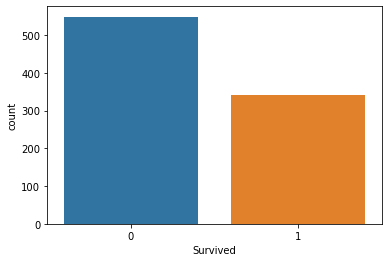

In [7]:
sns.countplot(data = train, x = 'Survived')

In [8]:
# 생존자 비율
train.Survived.sum() / train.Survived.count()

0.3838383838383838

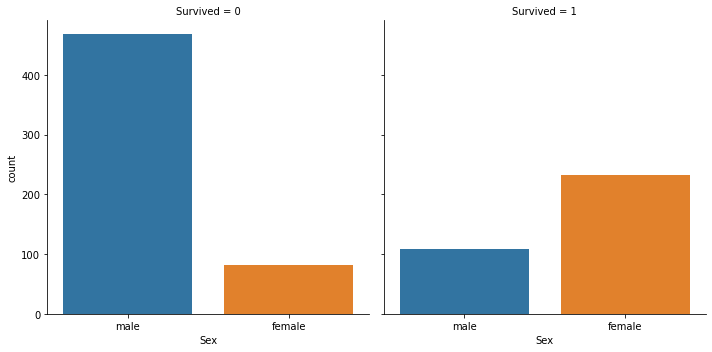

In [10]:
sns.catplot(data = train, x = 'Sex', col = 'Survived', kind = 'count')

<AxesSubplot:ylabel='Survived'>

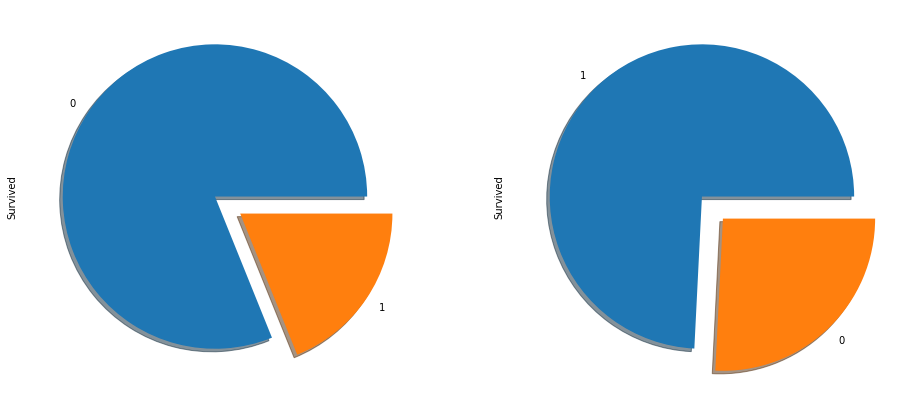

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
train['Survived'][train['Sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.2], ax=ax[0], shadow=True)
train['Survived'][train['Sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.2], ax = ax[1], shadow=True)

In [15]:
train_copied = train.copy()
train_copied.dropna(inplace = True)

/var/folders/q_/9_6p6pz91bj5_f7fgx87n63h0000gn/T/ipykernel_11244/3688479947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_copied['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

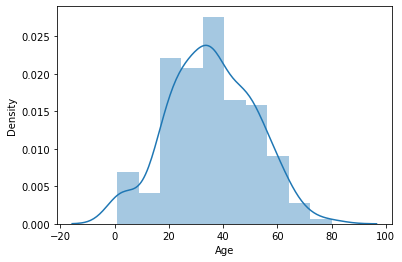

In [16]:
sns.distplot(train_copied['Age'])

Text(0.5, 1.0, 'Survival Rates based on gender and class')

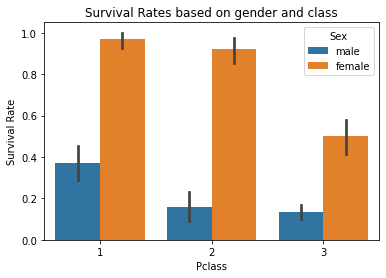

In [19]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data=train)
plt.ylabel('Survival Rate')
plt.title('Survival Rates based on gender and class')


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

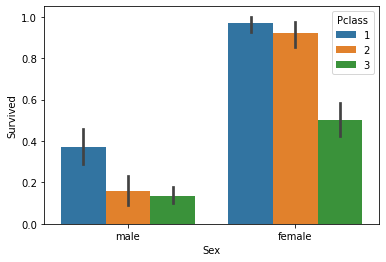

In [22]:
sns.barplot(x="Sex", y = 'Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

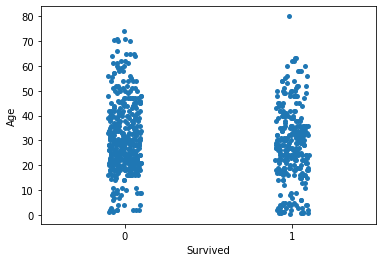

In [24]:
sns.stripplot(x="Survived", y = "Age", data=train)

/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


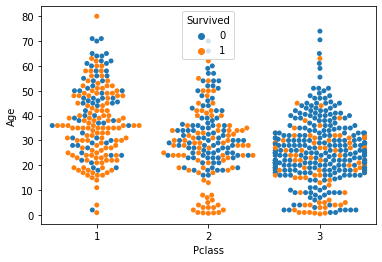

In [31]:
sns.swarmplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train)
plt.set_title('Survived by age and class')

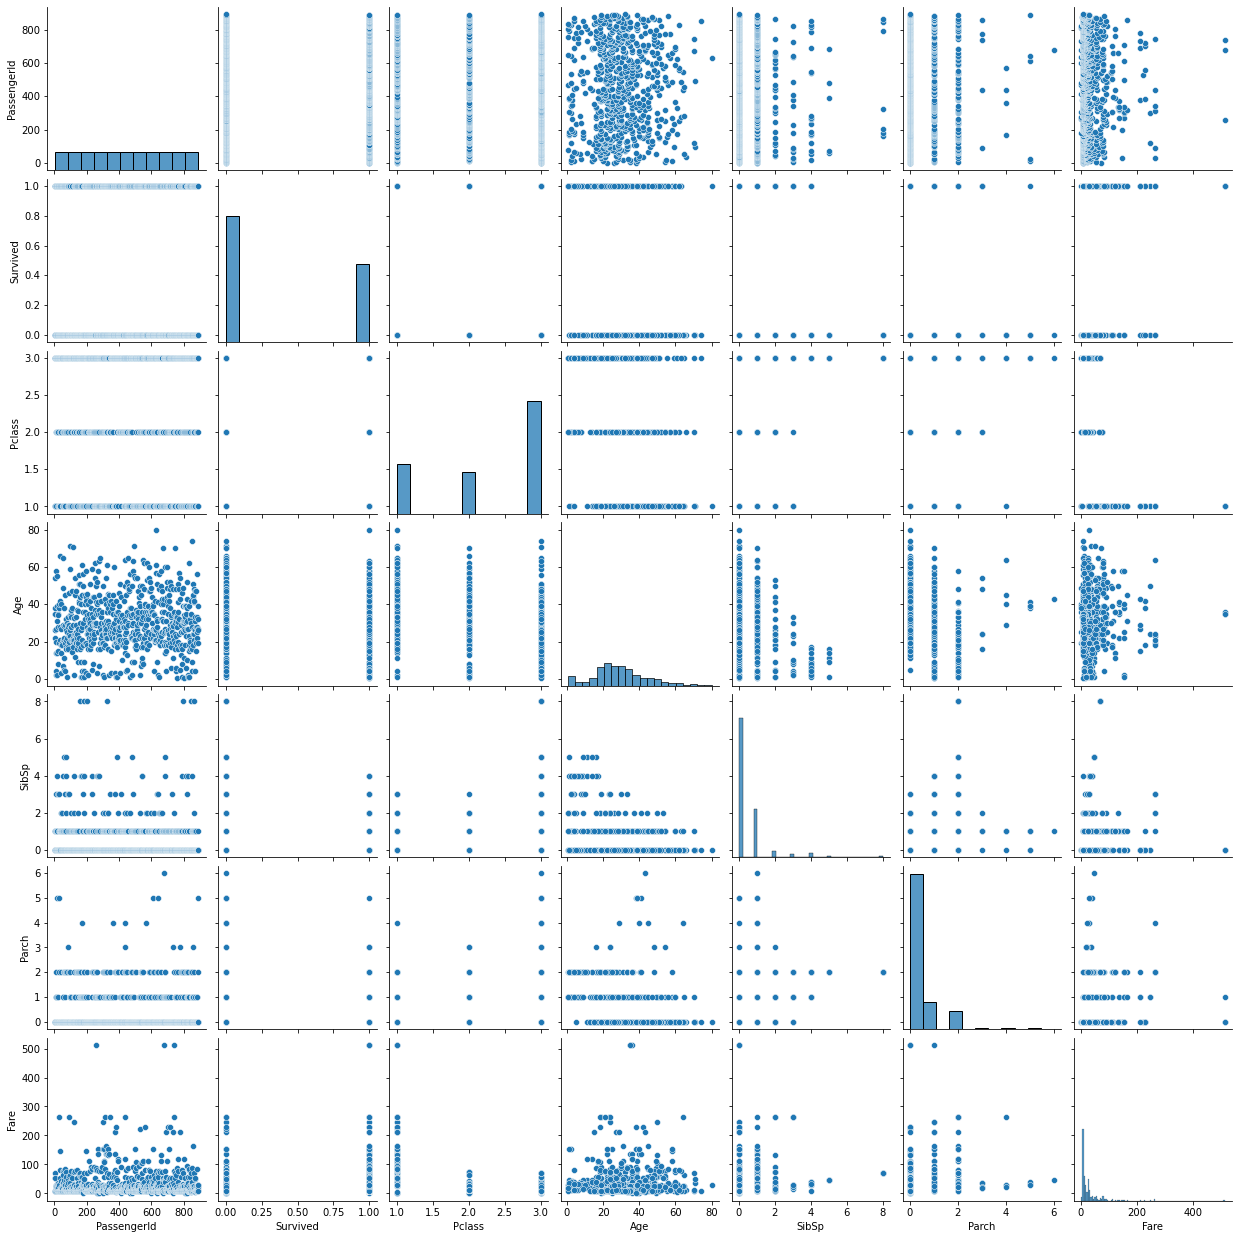

In [29]:
# 각 column별 데이터에 대한 상관관계나 분류적 특성 확인
sns.pairplot(train)
# sns.pairplot(train, hue='Sex')

/var/folders/q_/9_6p6pz91bj5_f7fgx87n63h0000gn/T/ipykernel_11244/816884001.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  f = sns.distplot(train.Fare, ax=axarr[0])


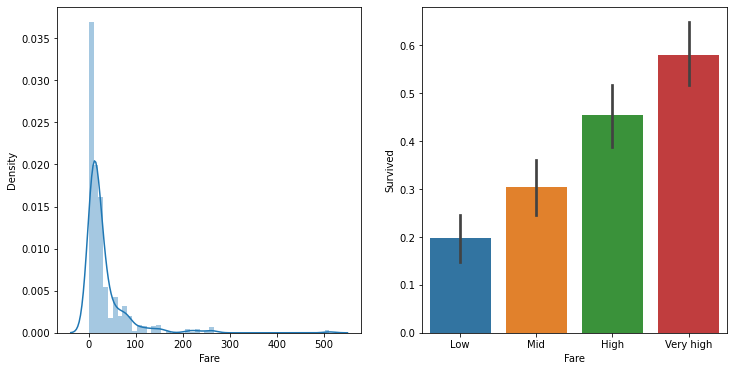

In [32]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
f = sns.distplot(train.Fare, ax=axarr[0])
fare_ranges = pd.qcut(train.Fare, 4, labels=['Low', 'Mid', 'High', 'Very high'])
g = sns.barplot(x = fare_ranges, y = train.Survived, ax=axarr[1])

/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emily/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Use

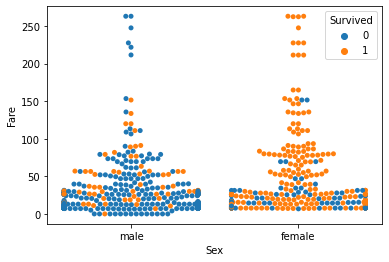

In [33]:
sns.swarmplot(x = 'Sex', y = 'Fare', hue='Survived', data = train.loc[train.Fare < 500])

<AxesSubplot:>

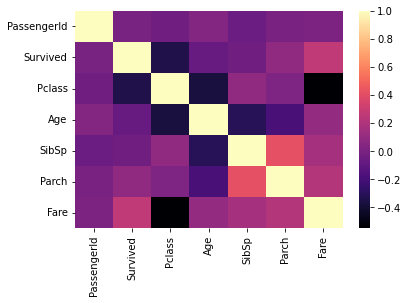

In [34]:
sns.heatmap(train.corr(), cmap="magma")